<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Анализ данных по перелетам между городами США в 2008 году с помощью Pandas и Seaborn</center>

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (~ 114 Mb, при разархивации - ~ 690 Mb). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).
Данные  содержат перелеты между аэропортами США в 2008 году.

**Считаем данные в память в объект Pandas.DataFrame (это может занять пару минут).**

In [2]:
flights_df = pd.read_csv('../../data/2008.csv.bz2')

In [3]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 29)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [4]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


In [5]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


**Число уникальных рейсов:**

In [6]:
flights_df['FlightNum'].nunique()

7539

**Мы можем выполнять группировки для расчета различных аггрегированных статистик.**

**Найдем топ-3 рейсов, совершивших самые длинные перелеты за 2008 год.**

In [7]:
flights_df.groupby('FlightNum')['Distance']\
  .sum().sort_values(ascending=False)\
  .iloc[0:3]

FlightNum
1     7793942
15    7639878
2     6888300
Name: Distance, dtype: int64

**Или так:**

In [8]:
flights_df.groupby('FlightNum')\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': {'_total': np.sum}})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                Cancelled
                  mean      sum count    _total
FlightNum                                      
1          1925.380929  7793942  4048        42
15         1823.795178  7639878  4189        51
2          1873.347838  6888300  3677        53

**Построение сводной таблицы:**

In [9]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Бывает удобно "раскрашивать" такие сводные таблицы:**

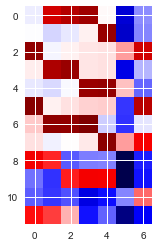

In [10]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic',interpolation='none')

**Гистограмма длин перелетов.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022541D30978>]], dtype=object)

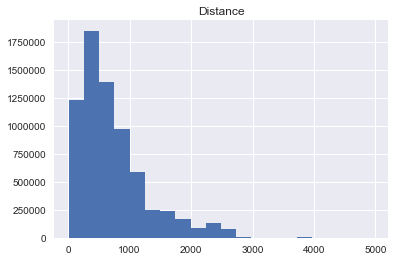

In [11]:
flights_df.hist('Distance', bins=20)

**Гистограмма частот перелетов в зависимости от даты.**

In [12]:
flights_df['Date'] = pd.to_datetime(flights_df.Year*10000 + 
                                    flights_df.Month*100 + 
                                    flights_df.DayofMonth, 
                            format='%Y%m%d')

In [13]:
num_flights_by_date = flights_df.groupby('Date')['FlightNum'].agg('count')

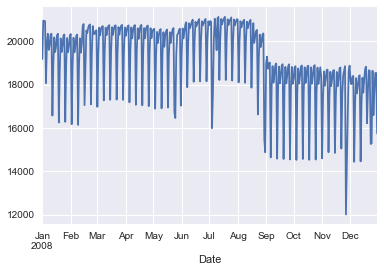

In [14]:
num_flights_by_date.plot()

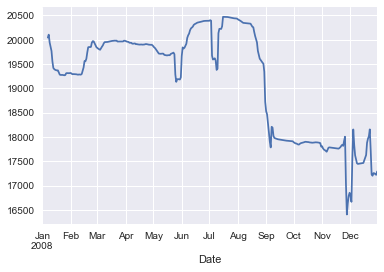

In [15]:
pd.rolling_mean(num_flights_by_date, 7).plot()

**1. Найдите топ-10 массовых перевозчиков (UniqueCarrier).**

*Если под "массовостью" перевозчика понимать количество совершенных рейсов:*

In [46]:
f = flights_df.groupby('UniqueCarrier')\
    .size().sort_values(ascending=False)\
      .iloc[0:10].to_frame()
f.columns = ['Flights_total']
f

,Flights_total
UniqueCarrier,
WN,1201754
AA,604885
OO,567159
MQ,490693
US,453589
DL,451931
UA,449515
XE,374510
NW,347652


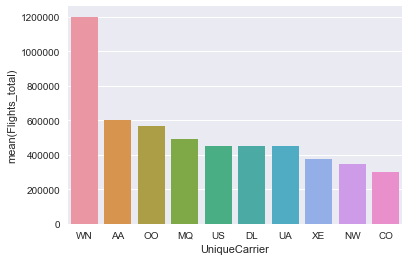

In [47]:
sns.barplot(data = f, x = f.index, y = f['Flights_total']);

**2. Постройте распределение причин отмены рейсов (CancellationCode).**

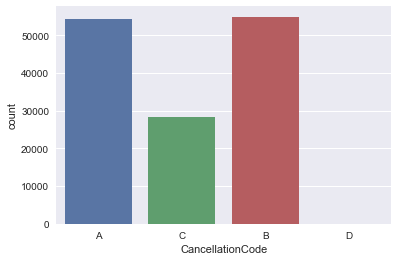

In [48]:
sns.countplot(flights_df['CancellationCode']);

**3. Найдите самый популярный маршрут, отобразите статистику по данному маршруту (просто describe для подвыборки).**

*Если под маршрутом понимать перелеты всех рейсов между конкретной парой аэропортов, то:*

In [49]:
flights_df['OrDest'] = flights_df["Origin"].map(str) + flights_df["Dest"].map(str)

In [50]:
flights_df['OrDest'].value_counts().iloc[:5]

SFOLAX    13788
LAXSFO    13390
OGGHNL    12383
LGABOS    12035
BOSLGA    12029
Name: OrDest, dtype: int64

*Таким образом, самые популярные рейсы соединяют Сан-Франциско и Лос-Анджелес.*

In [51]:
flights_df[flights_df['OrDest'] == 'SFOLAX'].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,13788.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,13788.0,6.337322,3.358147,1.0,3.0,6.0,9.0,12.0
DayofMonth,13788.0,15.730418,8.791381,1.0,8.0,16.0,23.0,31.0
DayOfWeek,13788.0,3.862997,1.973866,1.0,2.0,4.0,5.0,7.0
DepTime,13299.0,1371.032408,489.328348,3.0,941.0,1355.0,1809.0,2400.0
CRSDepTime,13788.0,1356.596388,472.940974,540.0,945.0,1315.0,1756.0,2240.0
ArrTime,13286.0,1481.378820,502.009856,1.0,1054.0,1507.0,1919.0,2400.0
CRSArrTime,13788.0,1493.550116,473.465680,5.0,1110.0,1443.0,1920.0,2359.0
FlightNum,13788.0,1862.825573,1999.167552,4.0,817.0,1153.0,1957.0,7815.0
ActualElapsedTime,13285.0,82.417840,10.184247,58.0,75.0,81.0,88.0,196.0


**4. Найдите топ-5 рейсов (по числу полетов) по каждому из типов задержек рейсов. Каким перевозчикам они принадлежат?**

Поскольку номера полетов разных перевозчиков могут совпадать, то в качестве уникального кода рейса для данной задачи используем комбинацию названия авикомпании и номера полета. 

In [105]:
flights_df['UniqueFlight'] = flights_df['UniqueCarrier'].map(str) + '-' + flights_df['FlightNum'].map(str)

In [106]:
delays_list = flights_df.columns[-8:-3].values
df = pd.DataFrame()
for delay in delays_list:
    data = flights_df[flights_df[delay] > 0].groupby('UniqueFlight').size().to_frame()
    data['Delay'] = delay
    data.columns = ['Flights_total', 'Delay']
    df = df.append(data)

df.groupby('Delay')['Flights_total'].nlargest(5)

Delay              UniqueFlight
CarrierDelay       WN-50           288
                   WN-24           250
                   WN-46           248
                   WN-54           239
                   WN-40           237
LateAircraftDelay  WN-50           465
                   WN-44           379
                   WN-40           376
                   WN-24           372
                   WN-46           367
NASDelay           AA-350          245
                   AA-1555         238
                   AA-1763         234
                   B6-1069         227
                   AS-67           220
SecurityDelay      AS-52            41
                   AS-55            23
                   CO-47            20
                   AS-167           18
                   YV-2877          14
WeatherDelay       CO-539          147
                   OH-5685          82
                   NW-648           80
                   CO-449           77
                   OH-5257      

Топ-5 рейсов по CarrierDelay и LateAircraftDelay принадлежат перевозчику WN (Southwest Airlines).   
Топ-5 рейсов по NASDelay принадлежат перевозчикам AA (American Airlines), B6 (JetBlue Airways) и AS (Alaska Airlines).   
Топ-5 рейсов по SecurityDelay  принадлежат перевозчикам AS (Alaska Airlines), CO (Continental Airlines) и YV.   
Топ-5 рейсов по WeatherDelay  принадлежат перевозчикам CO (Continental Airlines), OH, NW (Northwest Airlines).   

In [60]:
# f = flights_df.groupby(['CancellationCode', 'UniqueCarrier']).size().to_frame().reset_index()
# f.columns = ['CancellationCode', 'UniqueCarrier', 'Flight_num']
# f.set_index('UniqueCarrier', inplace = True)
# f.groupby(['CancellationCode'])['Flight_num'].nlargest(5)

**5. Определите, как распределено количество рейсов в зависимости от времени дня?**

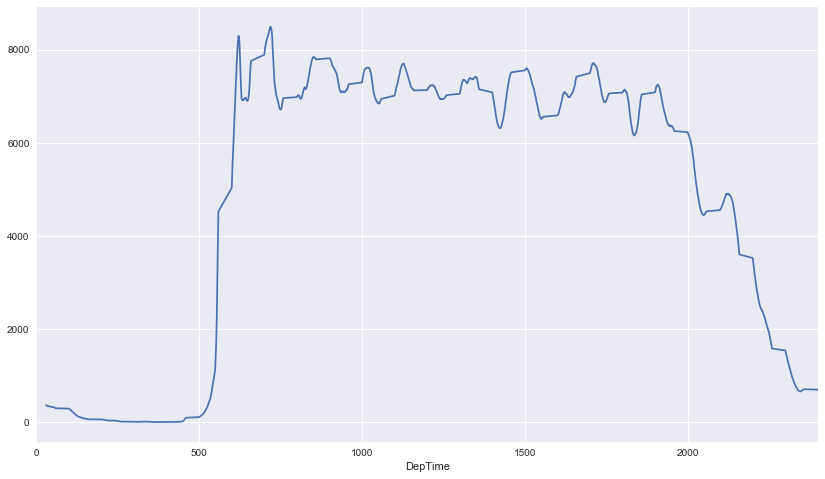

In [112]:
pylab.rcParams['figure.figsize'] = (14, 8)
num_flights_by_time = flights_df.groupby('DepTime')['FlightNum'].agg('count')
pd.rolling_mean(num_flights_by_time, 30).plot();

Большая часть рейсов совершается в промеждуток между 5:30 и 22:00. Пик приходится на раннее утро (5:55 - 7:00), затем количество вылетов снижается и в среднем держится на одном уровне до 19:00, а затем снова постепенно снижается. Четко выражены скачки в количестве рейсов в течение дня, вероятно это связано с оосбенностями составления графика вылетов в аэропортах. Количество ночных вылетов минимально. 

**6. Опишите, как число полетов меняется во времени (по дням/неделям/месяцам), и проинтерпретируйте.**

#### По дням недели

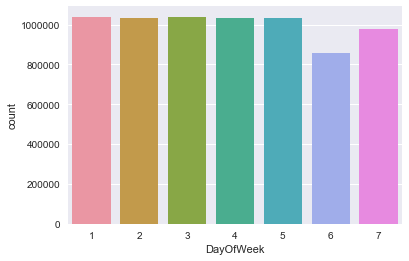

In [114]:
pylab.rcParams['figure.figsize'] = (6, 4)
sns.countplot(flights_df['DayOfWeek']);

Количество перелетов, совершаемых в уикенды, ниже, чем в рабочие дни. Особенно снижается количество рейсов в субботу. Можно предположить, что большая часть перелетов в США связана с рабочими поездками и командировками. 

#### По числам месяца

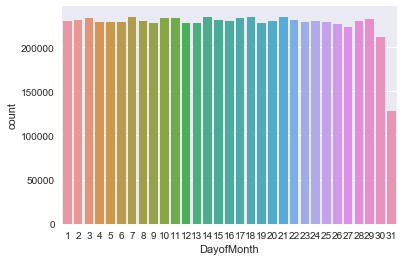

In [115]:
sns.countplot(flights_df['DayofMonth']);

Распределение полетов по числам месяцев довольно равномерно с небольшими отклонениями, за исключением 30 и 31 числа. Это связано с тем, что в некоторых месяцах всего 30 дней. Снижение полетов 30 числа также, скорее всего, объясняется тем, что в феврале 28-29 дней. 

#### По месяцам

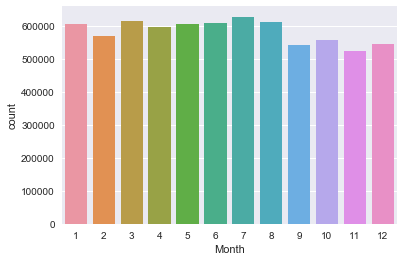

In [116]:
sns.countplot(flights_df['Month']);

На данном графике видна общая тенденция к увеличению количества полетов в весенние и летние месяцы. Максимум приходится на июль, минимум на ноябрь. 

#### По неделям течение года

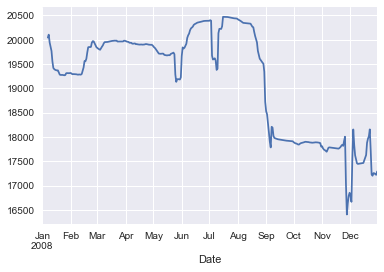

In [122]:
pd.rolling_mean(num_flights_by_date, 7).plot();

На графике хорошо видно резкое снижение количества перелетов в официальные праздничные дни: День Поминовения (26 мая), День Независимости (4 июля), День Труда (1 сентября), День Благодарения (27 ноября), Рождество (25 декабря). Наблюдается существенное снижение количества полетов с сентября по конец декабря. 